In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import io
import requests
import os
from data_utilities import *

from random import randint
from time import sleep
from tqdm import tqdm 

### TODO 
- newconect  https://newconnect.pl/notowania
- wig20 
- CSVki <b>DONE</b>

### INSTRUCTION 
 All usefull funtions are in file data_utilities.py. They allow for downloading and minpulating data form stooq.pl:
 - get_stock_names - reads stock's names from files in <b>"names_data"</b> directory 
 - download_stock_data - downloads data for stock with given names
 - download_multi_stock - downloads data for multiple stocks
 - to_one_csv - creates one dataframe from data in given directorty 


In [4]:
### names files to chose (main stocks or NC)
file_names = os.listdir("names_data")
print(file_names)

### get names 
names = get_stock_names(file = file_names[0])["Skrót"]
names = np.array(names)

### read data
download_multi_stock(names, save_stats = True, save_dir = "NC_data")


  0%|          | 0/397 [00:00<?, ?it/s]

['main_names.tsv', 'NC_names.tsv']


100%|██████████| 397/397 [35:53<00:00,  5.42s/it]


,Data,Name
0,1997-06-12,06N
1,2010-10-28,11B
2,2010-11-30,4FM
3,2006-09-21,ABE
4,2011-08-11,ACG
...,...,...
392,2012-10-30,ZEP
393,1999-08-03,PUE
394,2008-04-25,ZRE
395,2010-10-01,ZUE


100%|██████████| 397/397 [00:01<00:00, 217.25it/s]


<AxesSubplot:xlabel='Data'>

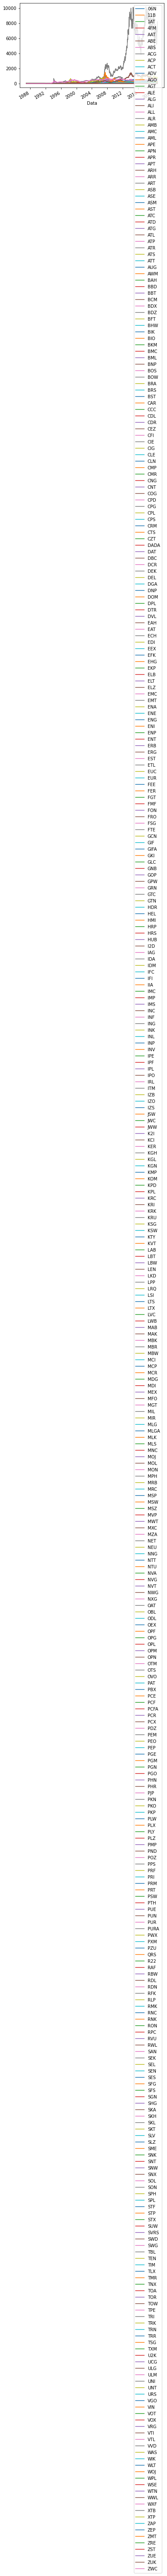

In [233]:
### creates once data frame form all stocks in directory 
df = to_one_csv()
# df.to_csv("main_stock.tsv", sep = "\t")

### plot time series 

<AxesSubplot:xlabel='Data'>

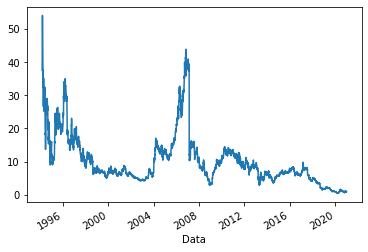

In [5]:
## download 
data = download_stock_data("RFK", save = False)
data["Data"] = pd.to_datetime(data["Data"], dayfirst=True)
data = data.set_index('Data')
data["Zamkniecie"].plot()

<AxesSubplot:xlabel='Data'>

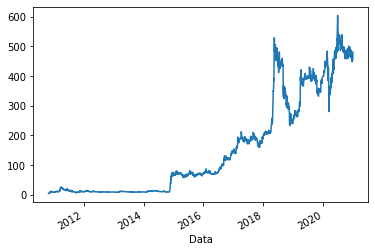

In [7]:
### from file 
data = pd.read_csv("stock_data/11B.tsv", sep = "\t", index_col = 0)
data["Data"] = pd.to_datetime(data["Data"]) ## i guess i  dont need it dayfirst=True
data = data.set_index('Data')
data["Zamkniecie"].plot()